C:\Users\kelly\AppData\Local\Temp\ipykernel_25576\943601975.py:62: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['Per Capitaincome'] = pd.to_numeric(df1['Per Capitaincome'].str.replace('[^-.0-9]', ''))


AttributeError: 'int' object has no attribute 'patches'

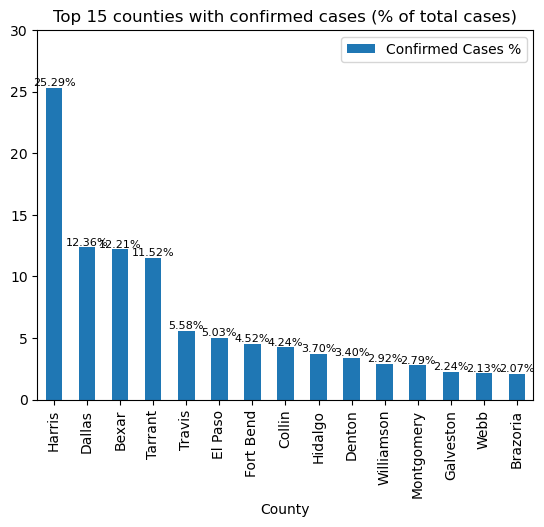

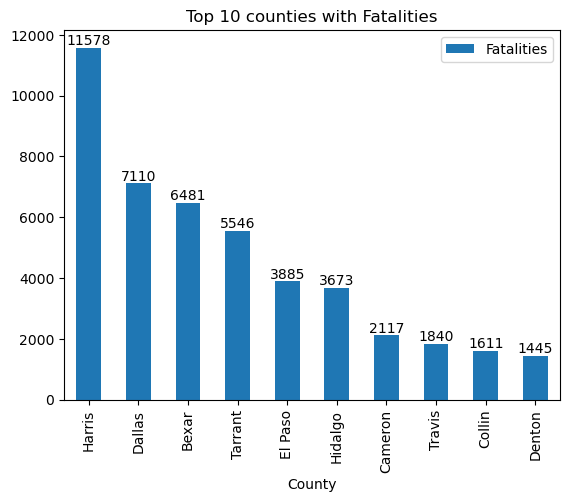

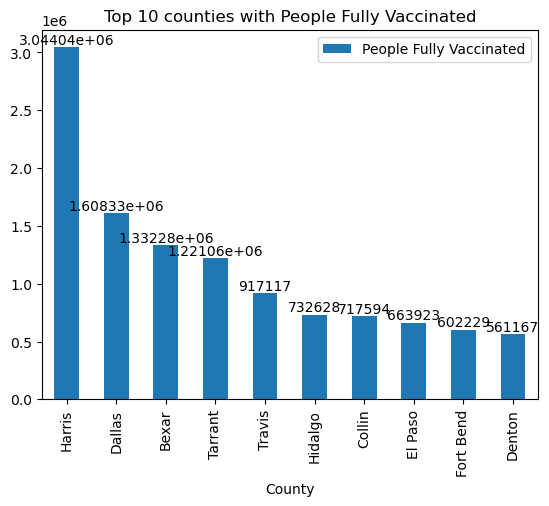

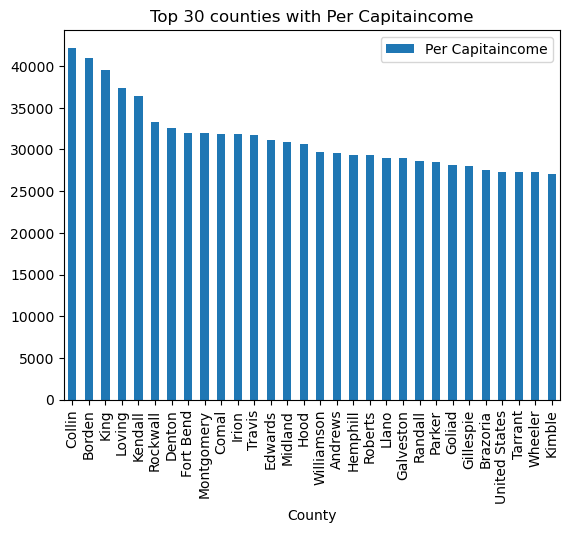

In [24]:
import pandas as pd
import requests 
import wikipediaapi
from bs4 import BeautifulSoup 

def get_table(url):
    table_class="wikitable sortable jquery-tablesorter"
    response=requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    indiatable=soup.find('table',{'class':"wikitable"})
 
    df=pd.read_html(str(indiatable))
    df=pd.DataFrame(df[0])
    return df

url1="https://en.wikipedia.org/wiki/List_of_Texas_locations_by_per_capita_income"
url2="https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Texas"
df1 = get_table(url1);
df1_original_keys = df1.keys()
df1_correct_keys = ['Rank', 'County', 'Per Capitaincome', 'Median Household Income', 'Median Family Income', 'Population', 'Number of Households']
index=  0
for key in df1_original_keys:
    df1 = df1.rename(columns={x: x.replace(key, df1_correct_keys[index]) for x in df1.columns})
    index += 1


df2 = get_table(url2);
original_keys = df2.keys()
correct_keys = ['County', 'Confirmed Cases', 'ProbableCases', 'TotalCases', 'Fatalities', 'People Fully Vaccinated', 'Population', 'TotalCases']
index=  0
for key in original_keys:
    df2 = df2.rename(columns={x: x.replace(key, correct_keys[index]) for x in df2.columns})
    index += 1
df2 = df2.iloc[:-2 , :]
df2 = df2.tail(-1)
df2['Confirmed Cases'] = pd.to_numeric(df2['Confirmed Cases'])
df2['Fatalities'] = pd.to_numeric(df2['Fatalities'])
df2['People Fully Vaccinated'] = pd.to_numeric(df2['People Fully Vaccinated'])
df2['Population'] = pd.to_numeric(df2['Population'])
df2['ProbableCases'] = pd.to_numeric(df2['ProbableCases'])

top10 = df2.groupby('County')['Confirmed Cases'].max().sort_values(ascending=False)[:15]
top10 = pd.DataFrame({'County': top10.index, 'Confirmed Cases': top10.values})
top10['Confirmed Cases %'] = round(top10['Confirmed Cases'] / top10['Confirmed Cases'].sum() * 100, 2)
top10 = top10.sort_values('Confirmed Cases', ascending=False)
plot = top10.plot.bar(x="County", y="Confirmed Cases %", title="Top 15 counties with confirmed cases (% of total cases)")

for cnt in plot.containers:
    plot.bar_label(cnt, label_type='edge', fontsize=8, labels=[f"{h:.2f}%" for h in cnt.datavalues])
plot.set_ylim(0, 30)

top10 = df2.nlargest(10 , "Fatalities")
plot = top10.plot.bar(x = "County" , y = "Fatalities" , title = "Top 10 counties with Fatalities")
for cnt in plot.containers:
        plot.bar_label(cnt)
        
top10 = df2.nlargest(10 , "People Fully Vaccinated")
plot = top10.plot.bar(x = "County" , y = "People Fully Vaccinated" , title = "Top 10 counties with People Fully Vaccinated")
for cnt in plot.containers:
        plot.bar_label(cnt)

df1['Per Capitaincome'] = pd.to_numeric(df1['Per Capitaincome'].str.replace('[^-.0-9]', ''))
top10 = df1.nlargest(30 , "Per Capitaincome")
plot = top10.plot.bar(x = "County" , y = "Per Capitaincome" , title = "Top 30 counties with Per Capitaincome")



for cnt in plot.containers:
        plot.bar_label(30)


af_new = df2.set_index("County")


I identified the Texas counties with the greatest number of confirmed cases and fatalities in the first bar graph. In order to calculate the rate of mortality among people infected by the virus, I compared the bar graphs. I found Harris county to have  the largest number of fatalities, with over 11,578 deaths. This is probably because there were so many confirmed cases in the county. As they received over  1,170,566 in confirmed cases. In perspective, the Harris County casualty rate wasn't really too high in comparison to the number of verified cases. Their advanced healthcare systems and higher per capita income could be responsible for this.  In contrast, despite having just half the known cases, Dallas and Bexar counties had almost 500,000 confirmed cases and 6,500 deaths.

I defined the URLs and created a dictionary for both URLs so I can call the bar graphs freely. 

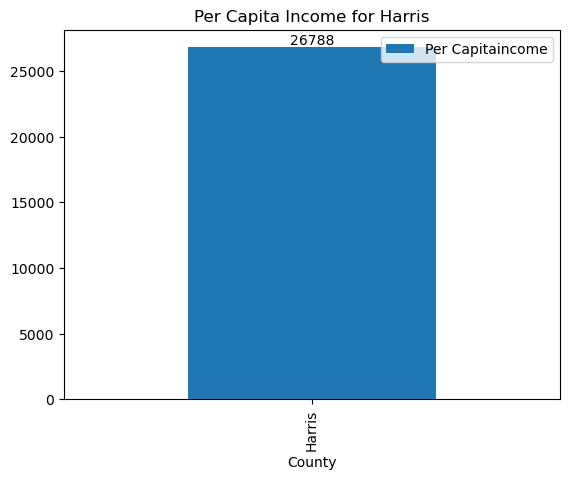

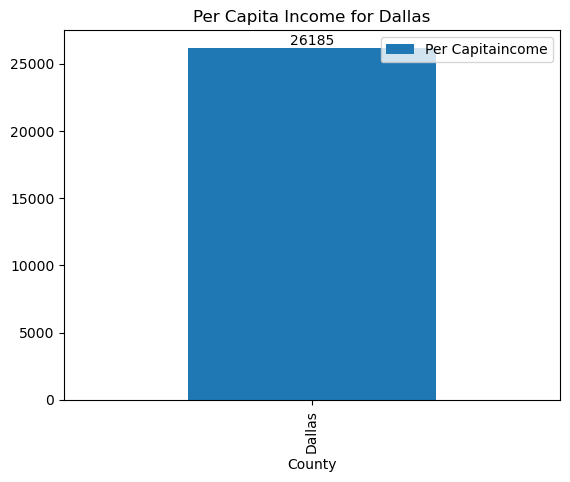

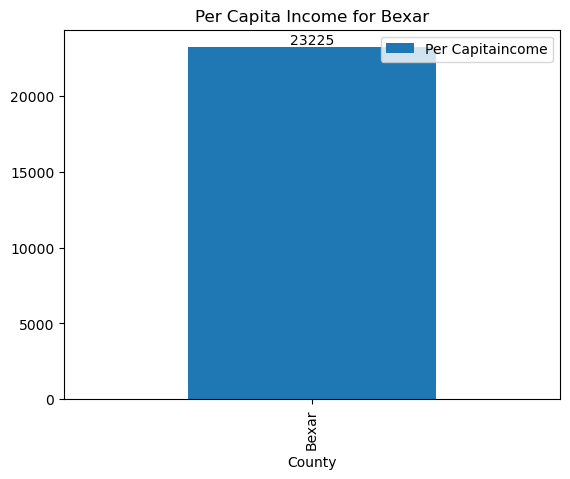

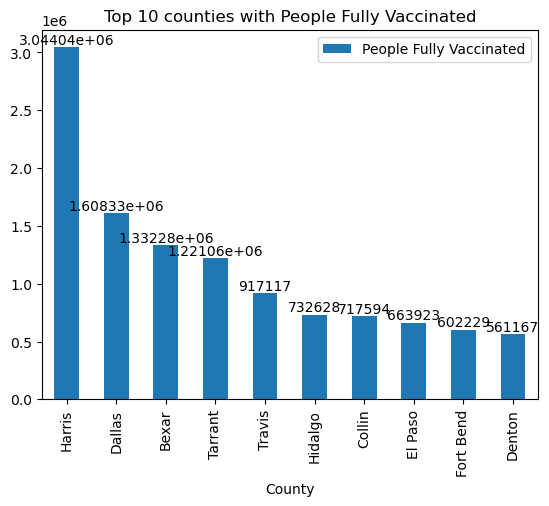

In [20]:
county_name = "Harris"
df_county = df1.loc[df1["County"] == county_name]

plot = df_county.plot.bar(x="County", y="Per Capitaincome", title=f"Per Capita Income for {county_name}")

for cnt in plot.containers:
    plot.bar_label(cnt, label_type='edge')
    
    
county_name = "Dallas"
df_county = df1.loc[df1["County"] == county_name]


plot = df_county.plot.bar(x="County", y="Per Capitaincome", title=f"Per Capita Income for {county_name}")

for cnt in plot.containers:
    plot.bar_label(cnt, label_type='edge')
    
county_name = "Bexar"
df_county = df1.loc[df1["County"] == county_name]


plot = df_county.plot.bar(x="County", y="Per Capitaincome", title=f"Per Capita Income for {county_name}")

for cnt in plot.containers:
    plot.bar_label(cnt, label_type='edge')
    
top10 = df2.nlargest(10 , "People Fully Vaccinated")
plot = top10.plot.bar(x = "County" , y = "People Fully Vaccinated" , title = "Top 10 counties with People Fully Vaccinated")
for cnt in plot.containers:
        plot.bar_label(cnt)
        
        


I think that Harris County's high vaccination rate of 3,044,041 dose, which is three times greater than the rates in Bexar County and Dallas County. Is what has helped it to attain a lower fatality rate than either of those two counties. Due to the fact that Harris County has a higher income per person, Bexar County and Dallas County may not have been able to get immunizations at the same rate, leading to almost identical death rates in their counties. The disparities in mortality rates and vaccination rates are impacted by a number of variables, including income, political prejudices, and vaccine reluctance.

In [1]:
def PlotGraph(County , df):
    df1 = df.loc[County][["Population" , "People Fully Vaccinated" , "Confirmed Cases" , "Fatalities"]]
    plot = df1.plot.bar(title = County)
    for cnt in plot.containers:
        plot.bar_label(cnt)

PlotGraph( "Dallas", af_new)

NameError: name 'af_new' is not defined

After comparing all of the bar graphs in my research, I discovered that there can be many biases caused by the distribution of vaccines based on an individual's wealth. First off, there is a well-known problem with wealth disparity, and those who are less fortunate financially might not have as easy access to healthcare services as people who earn more money do. This may result in unequal vaccination rates, with socioeconomically disadvantaged people having a lower likelihood of receiving the shot. The distribution of vaccines may also be influenced by a person's location. In Texas, for instance, some regions may get more vaccinations because of their greater per capita incomes. This can lead to even more inequities in vaccination distribution while also perpetuating existing socioeconomic gaps. Also, there were many prejudices in this study that resulted in people in certain areas having higher fatality rates because they refused to receive the vaccination according to their own personal principles. The prejudices of those who chose to not believe in COVID-19, in my opinion, had a massive impact on death rates within the counties. After closely examining the income per capita by county in Texas, I discovered that all counties had comparable incomes, but the distribution of vaccination rates across the various counties was highly variable. I believe this was due to prejudices among the county's residents who felt that the impact of COVID-19 wasn't a major problem to them and made the problem worse.